### Preparing a pairwise heatmap
I was not able to figure out a direct way of generating a heatmap that would take pairs of strings as x- and y- coordinates, 
as well as a given value for the cell. 

To get around this, I converted the strings to Pandas Categories, then used their indices to create the heatmap. 

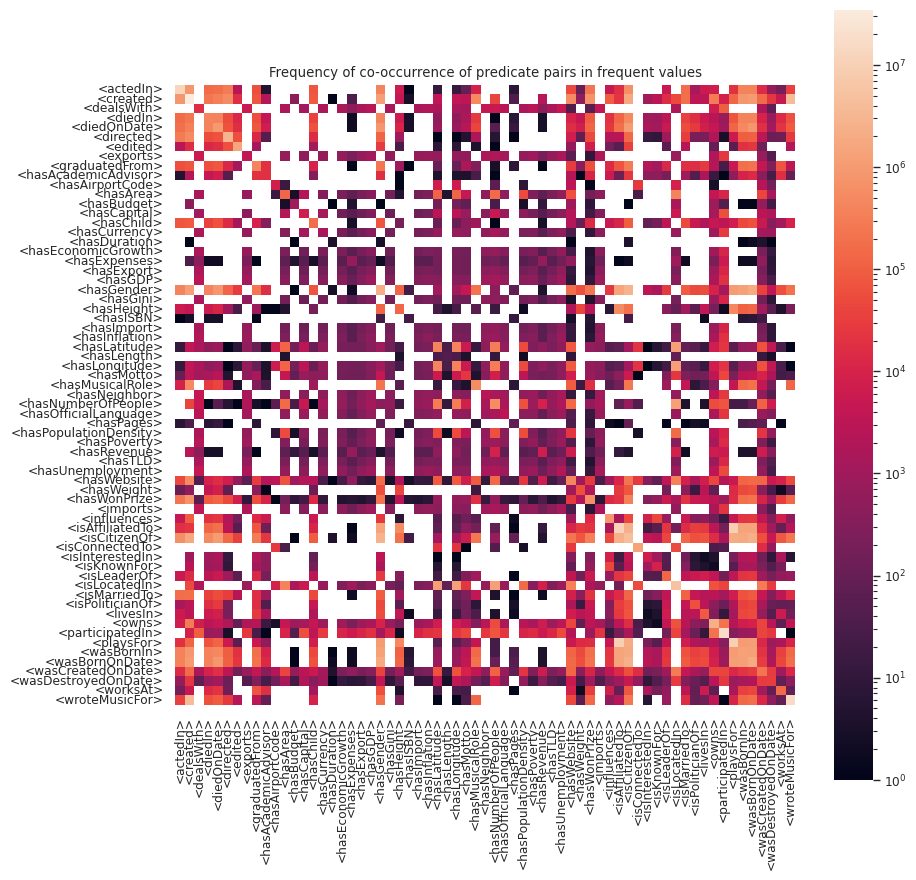

In [ ]:
utils.plot_pairwise_heatmap(count_cooccurring_predicates.to_pandas())

In [ ]:
sample_count=count_cooccurring_predicates
sample_count_pd = sample_count.to_pandas()

In [ ]:
sample_count_pd[["predicate", "predicate_right"]]=sample_count_pd[["predicate", "predicate_right"]].astype("category")
sample_count_pd[["predicate_int", "predicate_right_int"]]=sample_count_pd[["predicate", "predicate_right"]].apply(lambda x: x.cat.codes)
max_category = sample_count_pd[[
    "predicate_int",
    "predicate_right_int"
]].max().max()
# sample_count_pd["predicate_right_int"] = max_category - sample_count_pd["predicate_right_int"]

In [ ]:
sample_count_pd

,predicate,predicate_right,count,predicate_int,predicate_right_int
0,<created>,<created>,14961646,1,1
1,<actedIn>,<actedIn>,12652804,0,0
2,<isAffiliatedTo>,<isAffiliatedTo>,11679469,46,46
3,<isAffiliatedTo>,<playsFor>,9502390,46,58
4,<playsFor>,<isAffiliatedTo>,9502390,58,46
...,...,...,...,...,...
2203,<hasUnemployment>,<hasWonPrize>,1,40,43
2204,<hasImport>,<hasPoverty>,1,26,37
2205,<hasPages>,<worksAt>,1,35,64
2206,<hasMotto>,<isConnectedTo>,1,31,48


In [ ]:
# Set the proper coordinates
zz= np.zeros((max_category+1,max_category+1))
zz[sample_count_pd["predicate_int"], sample_count_pd["predicate_right_int"]] = sample_count_pd["count"]
# Set the proper labels
dd = dict(sorted(dict( zip( sample_count_pd['predicate'].cat.codes, sample_count_pd['predicate'] ) ).items()))

As the plot above attests, there is a huge difference in the number of occurrences of each pair: the most frequent pairs
are found millions of times, the least frequent pairs appear as few as once. 

To account for this, the heatmap has a log-normalized color bar.

Text(0.5, 1.0, 'Frequency of co-occurrence of predicate pairs in frequent values')

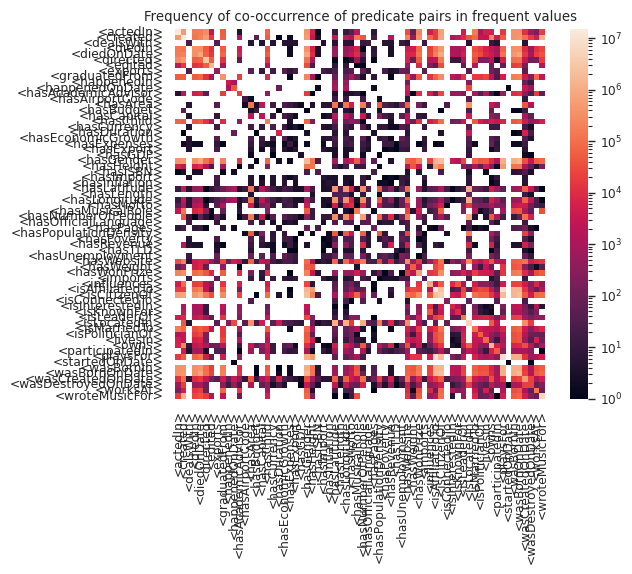

In [ ]:
from matplotlib.colors import LogNorm
norm = LogNorm()
ax = sns.heatmap(zz, robust=True, cmap="rocket", norm=norm, xticklabels=list(dd.values()),yticklabels=list(dd.values()), square=True)
ax.set_title("Frequency of co-occurrence of predicate pairs in frequent values")